The optimal number of neighbors  is 27


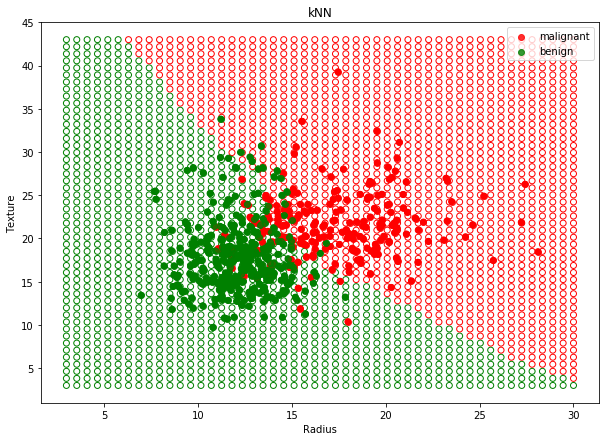

In [10]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict , GridSearchCV, RepeatedStratifiedKFold , cross_val_score
from sklearn import neighbors, datasets

kValues = list(range(1,100))
wine = datasets.load_breast_cancer()
X = wine.data[:, :2]
y = wine.target
colors = "rg"
cl = np.array(['red', 'green', 'blue'])
target_names=wine.target_names
cv_scores = []
for k in kValues:
    clf = neighbors.KNeighborsClassifier(n_neighbors = k)
    clf.fit(X, y)
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    


# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining the best k
optimal_k = kValues[MSE.index(min(MSE))]
print("The optimal number of neighbors  is %d" 
      % ( optimal_k))

x_min, x_max = 3, 30
y_min, y_max = 3, 43

kNN = neighbors.KNeighborsClassifier(n_neighbors = optimal_k)
kNN.fit(X, y)


plt.subplots( figsize=(10, 7))
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.title('kNN')
plt.scatter(xx, yy, edgecolors = cl[z], facecolors='none')
plt.scatter(X[:, 0], X[:, 1], color = cl[y])


for color, i ,  target_name in zip(colors,[0, 1], target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)


plt.xlabel('Radius')
plt.ylabel('Texture')

plt.show()

